In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.drop(columns=['CustomerID'] , inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


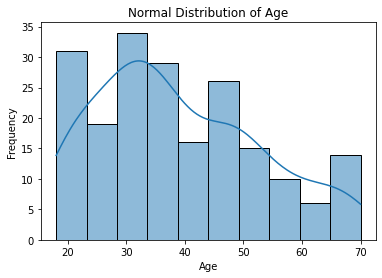

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Normal Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

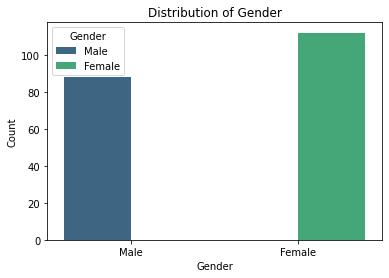

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, hue='Gender', palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

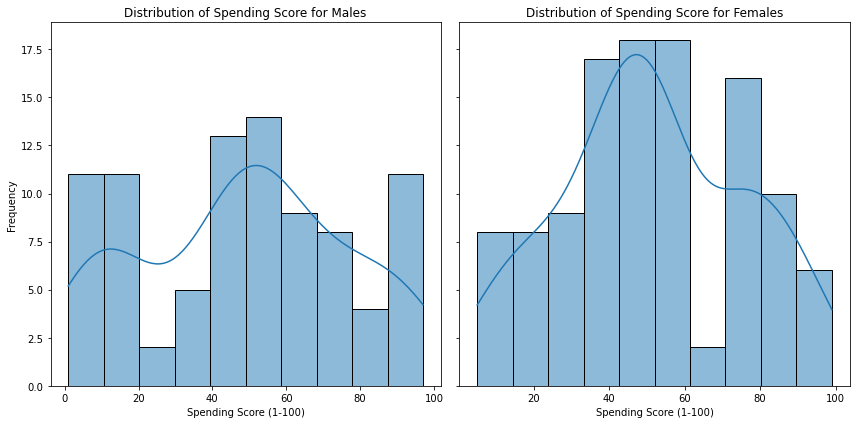

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# List of gender values and labels
genders = ['Male', 'Female']
labels = ['Males', 'Females']

for ax, gender, label in zip(axes, genders, labels):
    
    # Plotting the distribution
    sns.histplot(df['Spending Score (1-100)'][df['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.set_title(f'Distribution of Spending Score for {label}')
    ax.set_xlabel('Spending Score (1-100)')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

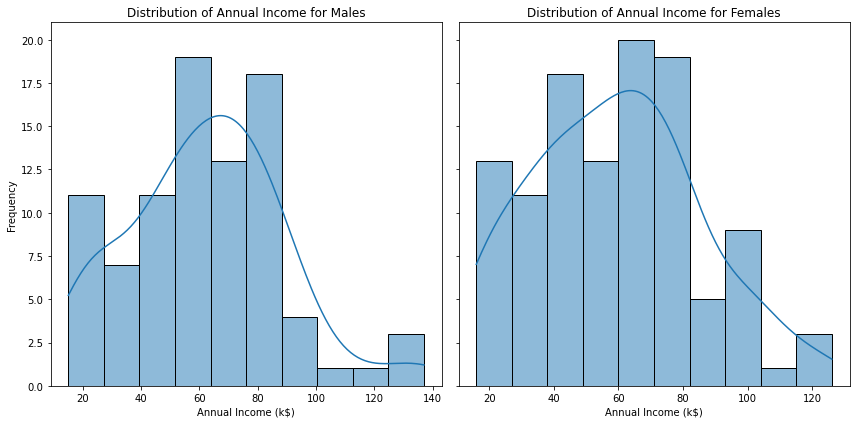

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
genders = ['Male', 'Female']
labels = ['Males', 'Females']
for ax, gender, label in zip(axes, genders, labels):
    sns.histplot(df['Annual Income (k$)'][df['Gender'] == gender], kde=True, bins=10, ax=ax)
    ax.set_title(f'Distribution of Annual Income for {label}')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

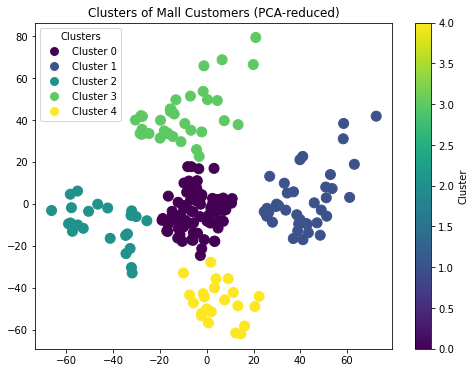

In [12]:

pca = PCA(n_components=2)
mall_pca = pca.fit_transform(df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(mall_pca)

# Add the cluster results to the DataFrame
df['cluster'] = clusters

# Plotting the clusters with PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mall_pca[:, 0], mall_pca[:, 1], c=clusters, cmap='viridis', s=100)

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10, linestyle='') for i in range(5)]
labels = [f'Cluster {i}' for i in range(5)]
plt.legend(handles=handles, labels=labels, title='Clusters')

plt.title('Clusters of Mall Customers (PCA-reduced)')
plt.colorbar(label='Cluster')
plt.show()